In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn 
import os
import matplotlib.pyplot as plt
%matplotlib inline

# read the csv in data frame


In [4]:
concrete_data = None 
try:
    # read dataset from the web
    concrete_data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
except:
    # if the file exists locally read it instead
    if os.path.exists('concrete_data.csv'):
        concrete_data=pd.read_csv('concrete_data.csv')
    else:
        raise "couldn't load the dataset"
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# separate features, and label

In [5]:
X = concrete_data.drop(columns=['Strength'], axis=1)
Y = concrete_data['Strength'] # Strength column

In [6]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# Scale data with standard scalar 

In [7]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, train_size=0.7)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
x_train.shape, y_train.shape

((721, 8), (721,))

# build the regression model model

In [11]:
def regression_model(h):
    model = Sequential()
    #input layer
    model.add(Dense(10, activation='relu', input_shape=(len(X.columns),)))
    for _ in range(h-1):
        # hidden layers
        model.add(Dense(10, activation='relu'))
    #prediction (y-hat) layer
    model.add(Dense(1))
    
    # training step
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
    

# part A

In [19]:
loss=[]
def part_a():
    model = regression_model(1)
    for i in range(50):
        history=model.fit(x_train, y_train, validation_split=0.3, epochs=50, validation_data=(x_test, y_test))
        val_loss=np.array(history.history['val_loss'])
        for vl in val_loss:
            loss.append(vl)
        print('({})validation loss  mean: {}'.format(i, val_loss.mean()))
        print('({})validation loss  standard deviation: {}'.format(i, val_loss.std()))


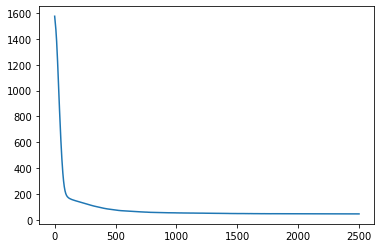

In [21]:
plt.plot(loss)

Epoch 1/50
16/16 [==============================] - 7s 131ms/step - loss: 1583.4966 - val_loss: 1576.5046
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 1536.7188 - val_loss: 1567.0223
Epoch 3/50
16/16 [==============================] - 0s 11ms/step - loss: 1448.3492 - val_loss: 1557.6354
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 1532.7444 - val_loss: 1548.1893
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 1447.2889 - val_loss: 1538.7106
Epoch 6/50
16/16 [==============================] - 0s 11ms/step - loss: 1472.1581 - val_loss: 1528.6497
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 1457.1683 - val_loss: 1518.5973
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 1440.1165 - val_loss: 1508.2139
Epoch 9/50
16/16 [==============================] - 0s 8ms/step - loss: 1397.3764 - val_loss: 1497.0371
Epoch 10/50
16/16 [==============================] - 0s 8m

Epoch 29/50
16/16 [==============================] - 0s 8ms/step - loss: 266.4950 - val_loss: 262.2746
Epoch 30/50
16/16 [==============================] - 0s 7ms/step - loss: 260.3130 - val_loss: 255.3876
Epoch 31/50
16/16 [==============================] - 0s 10ms/step - loss: 254.0060 - val_loss: 249.2789
Epoch 32/50
16/16 [==============================] - 0s 7ms/step - loss: 248.1957 - val_loss: 243.7720
Epoch 33/50
16/16 [==============================] - 0s 7ms/step - loss: 243.0800 - val_loss: 238.3414
Epoch 34/50
16/16 [==============================] - 0s 9ms/step - loss: 237.9427 - val_loss: 233.2923
Epoch 35/50
16/16 [==============================] - 0s 7ms/step - loss: 233.2243 - val_loss: 228.5746
Epoch 36/50
16/16 [==============================] - 0s 8ms/step - loss: 228.8735 - val_loss: 224.0478
Epoch 37/50
16/16 [==============================] - 0s 7ms/step - loss: 224.6536 - val_loss: 220.0205
Epoch 38/50
16/16 [==============================] - 0s 9ms/step - loss:

16/16 [==============================] - 0s 7ms/step - loss: 126.9324 - val_loss: 130.4373
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 126.5366 - val_loss: 130.2981
Epoch 36/50
16/16 [==============================] - 0s 8ms/step - loss: 126.3058 - val_loss: 130.0628
Epoch 37/50
16/16 [==============================] - 0s 7ms/step - loss: 125.9405 - val_loss: 129.6892
Epoch 38/50
16/16 [==============================] - 0s 6ms/step - loss: 125.5338 - val_loss: 129.3384
Epoch 39/50
16/16 [==============================] - 0s 6ms/step - loss: 125.2530 - val_loss: 129.0522
Epoch 40/50
16/16 [==============================] - 0s 8ms/step - loss: 124.8382 - val_loss: 128.7392
Epoch 41/50
16/16 [==============================] - 0s 6ms/step - loss: 124.5299 - val_loss: 128.4252
Epoch 42/50
16/16 [==============================] - 0s 6ms/step - loss: 124.2415 - val_loss: 128.2639
Epoch 43/50
16/16 [==============================] - 0s 6ms/step - loss: 123.9058 - v

Epoch 12/50
16/16 [==============================] - 0s 7ms/step - loss: 102.7037 - val_loss: 108.7879
Epoch 13/50
16/16 [==============================] - 0s 8ms/step - loss: 102.4514 - val_loss: 108.4357
Epoch 14/50
16/16 [==============================] - 0s 7ms/step - loss: 102.1235 - val_loss: 108.2915
Epoch 15/50
16/16 [==============================] - 0s 9ms/step - loss: 101.8769 - val_loss: 108.1781
Epoch 16/50
16/16 [==============================] - 0s 9ms/step - loss: 101.5698 - val_loss: 107.8858
Epoch 17/50
16/16 [==============================] - 0s 11ms/step - loss: 101.2886 - val_loss: 107.6724
Epoch 18/50
16/16 [==============================] - 0s 7ms/step - loss: 101.0415 - val_loss: 107.3960
Epoch 19/50
16/16 [==============================] - 0s 6ms/step - loss: 100.7252 - val_loss: 107.1677
Epoch 20/50
16/16 [==============================] - 0s 8ms/step - loss: 100.4937 - val_loss: 106.9894
Epoch 21/50
16/16 [==============================] - 0s 8ms/step - loss:

16/16 [==============================] - 0s 6ms/step - loss: 67.4206 - val_loss: 78.7946
Epoch 21/50
16/16 [==============================] - 0s 8ms/step - loss: 67.2064 - val_loss: 78.7519
Epoch 22/50
16/16 [==============================] - 0s 6ms/step - loss: 67.0845 - val_loss: 78.6764
Epoch 23/50
16/16 [==============================] - 0s 8ms/step - loss: 66.9678 - val_loss: 78.4590
Epoch 24/50
16/16 [==============================] - 0s 6ms/step - loss: 66.7461 - val_loss: 78.1804
Epoch 25/50
16/16 [==============================] - 0s 8ms/step - loss: 66.5897 - val_loss: 78.0705
Epoch 26/50
16/16 [==============================] - 0s 6ms/step - loss: 66.4656 - val_loss: 78.1998
Epoch 27/50
16/16 [==============================] - 0s 7ms/step - loss: 66.3114 - val_loss: 77.7919
Epoch 28/50
16/16 [==============================] - 0s 7ms/step - loss: 66.1247 - val_loss: 77.8126
Epoch 29/50
16/16 [==============================] - 0s 7ms/step - loss: 65.9886 - val_loss: 77.5185
Ep

16/16 [==============================] - 0s 7ms/step - loss: 51.2123 - val_loss: 64.6568
Epoch 30/50
16/16 [==============================] - 0s 6ms/step - loss: 51.1551 - val_loss: 64.5916
Epoch 31/50
16/16 [==============================] - 0s 6ms/step - loss: 50.9832 - val_loss: 64.9243
Epoch 32/50
16/16 [==============================] - 0s 7ms/step - loss: 50.9453 - val_loss: 64.9497
Epoch 33/50
16/16 [==============================] - 0s 7ms/step - loss: 50.9084 - val_loss: 64.8125
Epoch 34/50
16/16 [==============================] - 0s 7ms/step - loss: 50.8296 - val_loss: 64.8008
Epoch 35/50
16/16 [==============================] - 0s 7ms/step - loss: 50.7644 - val_loss: 64.4448
Epoch 36/50
16/16 [==============================] - 0s 7ms/step - loss: 50.6824 - val_loss: 64.3428
Epoch 37/50
16/16 [==============================] - 0s 6ms/step - loss: 50.6222 - val_loss: 64.6445
Epoch 38/50
16/16 [==============================] - 0s 7ms/step - loss: 50.5054 - val_loss: 64.5698
Ep

16/16 [==============================] - 0s 8ms/step - loss: 43.1595 - val_loss: 57.2348
Epoch 39/50
16/16 [==============================] - 0s 8ms/step - loss: 43.2720 - val_loss: 57.5655
Epoch 40/50
16/16 [==============================] - 0s 8ms/step - loss: 43.1044 - val_loss: 57.2298
Epoch 41/50
16/16 [==============================] - 0s 8ms/step - loss: 43.1156 - val_loss: 57.2026
Epoch 42/50
16/16 [==============================] - 0s 7ms/step - loss: 43.0574 - val_loss: 57.2028
Epoch 43/50
16/16 [==============================] - 0s 13ms/step - loss: 43.0658 - val_loss: 57.2162
Epoch 44/50
16/16 [==============================] - 0s 8ms/step - loss: 43.0446 - val_loss: 57.1083
Epoch 45/50
16/16 [==============================] - 0s 8ms/step - loss: 42.9788 - val_loss: 57.1125
Epoch 46/50
16/16 [==============================] - 0s 8ms/step - loss: 42.9504 - val_loss: 57.1847
Epoch 47/50
16/16 [==============================] - 0s 8ms/step - loss: 42.9812 - val_loss: 57.0615
E

16/16 [==============================] - 0s 6ms/step - loss: 40.0081 - val_loss: 53.9253
Epoch 48/50
16/16 [==============================] - 0s 6ms/step - loss: 39.8553 - val_loss: 53.8857
Epoch 49/50
16/16 [==============================] - 0s 5ms/step - loss: 39.8910 - val_loss: 53.5644
Epoch 50/50
16/16 [==============================] - 0s 5ms/step - loss: 39.7932 - val_loss: 53.9018
(18)validation loss  mean: 54.15422271728516
(18)validation loss  standard deviation: 0.2438581574924038
Epoch 1/50
16/16 [==============================] - 0s 19ms/step - loss: 39.7903 - val_loss: 53.7762
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 39.9006 - val_loss: 53.9671
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 39.7800 - val_loss: 53.8027
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 39.7659 - val_loss: 53.7207
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 39.7231 - val_loss: 53.6546
Ep

16/16 [==============================] - 0s 5ms/step - loss: 38.0237 - val_loss: 51.7126
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 38.0509 - val_loss: 51.9818
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 38.0418 - val_loss: 51.7910
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 38.0906 - val_loss: 52.0909
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 38.0389 - val_loss: 51.7551
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 37.9247 - val_loss: 51.6494
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 37.9839 - val_loss: 51.7842
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 37.9553 - val_loss: 51.8444
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 38.0600 - val_loss: 51.6341
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 37.9456 - val_loss: 51.9109
Epoch 1

16/16 [==============================] - 0s 6ms/step - loss: 36.8769 - val_loss: 50.1338
Epoch 14/50
16/16 [==============================] - 0s 5ms/step - loss: 36.6850 - val_loss: 50.3514
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 36.6634 - val_loss: 50.3587
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 36.6482 - val_loss: 50.4108
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 36.7304 - val_loss: 50.0865
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 36.6219 - val_loss: 50.3095
Epoch 19/50
16/16 [==============================] - 0s 5ms/step - loss: 36.5626 - val_loss: 50.4125
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 36.6195 - val_loss: 50.3478
Epoch 21/50
16/16 [==============================] - 0s 6ms/step - loss: 36.6359 - val_loss: 50.3209
Epoch 22/50
16/16 [==============================] - 0s 10ms/step - loss: 36.5939 - val_loss: 50.2669
E

16/16 [==============================] - 0s 4ms/step - loss: 35.5895 - val_loss: 48.7073
Epoch 23/50
16/16 [==============================] - 0s 6ms/step - loss: 35.5905 - val_loss: 48.7725
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 35.6240 - val_loss: 48.3596
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5684 - val_loss: 48.4157
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5775 - val_loss: 48.6423
Epoch 27/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5610 - val_loss: 48.4699
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 35.5362 - val_loss: 48.5938
Epoch 29/50
16/16 [==============================] - 0s 6ms/step - loss: 35.5571 - val_loss: 48.5499
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5537 - val_loss: 48.5445
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 35.5662 - val_loss: 48.4135
Ep

16/16 [==============================] - 0s 4ms/step - loss: 34.7815 - val_loss: 47.4967
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 34.7678 - val_loss: 47.5973
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 34.7470 - val_loss: 47.5140
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 34.8070 - val_loss: 47.5061
Epoch 35/50
16/16 [==============================] - 0s 6ms/step - loss: 34.7994 - val_loss: 47.7259
Epoch 36/50
16/16 [==============================] - 0s 6ms/step - loss: 34.7360 - val_loss: 47.4696
Epoch 37/50
16/16 [==============================] - 0s 5ms/step - loss: 34.8851 - val_loss: 47.1885
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 34.7404 - val_loss: 47.4848
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 34.7526 - val_loss: 47.7336
Epoch 40/50
16/16 [==============================] - 0s 5ms/step - loss: 34.7603 - val_loss: 47.6767
Ep

16/16 [==============================] - 0s 6ms/step - loss: 34.2443 - val_loss: 46.8088
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 34.2209 - val_loss: 46.9031
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 34.1865 - val_loss: 46.9096
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 34.2015 - val_loss: 46.8424
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 34.1842 - val_loss: 46.6997
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 34.3567 - val_loss: 46.5781
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 34.2994 - val_loss: 46.8775
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 34.2346 - val_loss: 46.6735
Epoch 48/50
16/16 [==============================] - 0s 4ms/step - loss: 34.3127 - val_loss: 46.6260
Epoch 49/50
16/16 [==============================] - 0s 4ms/step - loss: 34.1627 - val_loss: 46.9921
Ep

16/16 [==============================] - 0s 6ms/step - loss: 33.8475 - val_loss: 46.0621
Epoch 50/50
16/16 [==============================] - 0s 6ms/step - loss: 33.8251 - val_loss: 46.2958
(37)validation loss  mean: 46.35758140563965
(37)validation loss  standard deviation: 0.1302262278370833
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 33.7665 - val_loss: 46.3607
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 33.8516 - val_loss: 46.1441
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 33.8055 - val_loss: 46.2463
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 33.7779 - val_loss: 46.1702
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 33.7653 - val_loss: 46.2199
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 33.7808 - val_loss: 46.1790
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 33.7954 - val_loss: 46.3189
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 33.4403 - val_loss: 46.0707
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 33.4498 - val_loss: 45.9498
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 33.5078 - val_loss: 46.0218
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 33.4308 - val_loss: 46.0294
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 33.4917 - val_loss: 45.7922
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 33.4807 - val_loss: 45.9792
Epoch 13/50
16/16 [==============================] - 0s 5ms/step - loss: 33.4475 - val_loss: 46.2083
Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 33.4412 - val_loss: 45.9051
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 33.4357 - val_loss: 45.9104
Epoch 16/50
16/16 [==============================] - 0s 5ms/step - loss: 33.4352 - val_loss: 46.0465
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 33.1769 - val_loss: 45.6521
Epoch 17/50
16/16 [==============================] - 0s 5ms/step - loss: 33.2001 - val_loss: 45.6145
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 33.1704 - val_loss: 45.6852
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2070 - val_loss: 45.7211
Epoch 20/50
16/16 [==============================] - 0s 5ms/step - loss: 33.2071 - val_loss: 45.5100
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 33.1483 - val_loss: 45.6611
Epoch 22/50
16/16 [==============================] - 0s 4ms/step - loss: 33.1772 - val_loss: 45.6409
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 33.1937 - val_loss: 45.7320
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 33.2247 - val_loss: 45.6474
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 33.1410 - val_loss: 45.7606
Ep

16/16 [==============================] - 0s 4ms/step - loss: 33.0433 - val_loss: 45.3807
Epoch 26/50
16/16 [==============================] - 0s 5ms/step - loss: 33.0576 - val_loss: 45.5847
Epoch 27/50
16/16 [==============================] - 0s 4ms/step - loss: 32.9975 - val_loss: 45.3906
Epoch 28/50
16/16 [==============================] - 0s 5ms/step - loss: 33.0533 - val_loss: 45.3621
Epoch 29/50
16/16 [==============================] - 0s 5ms/step - loss: 33.0225 - val_loss: 45.4242
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 33.0315 - val_loss: 45.6445
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 32.9969 - val_loss: 45.5214
Epoch 32/50
16/16 [==============================] - 0s 5ms/step - loss: 32.9982 - val_loss: 45.2953
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 33.0026 - val_loss: 45.3179
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 33.0339 - val_loss: 45.6152
Ep

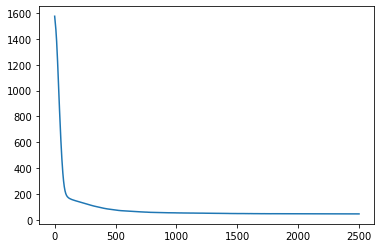

In [20]:
part_a()

# scaling data

In [12]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# part B

In [13]:
def part_b():
    #normalize the input data by standard deviation scalar
    model = regression_model(1)
    loss=[]
    for i in range(50):
        history=model.fit(x_train, y_train, validation_split=0.3, epochs=50, validation_data=(x_test, y_test))
        val_loss=np.array(history.history['val_loss'])
        for vl in val_loss:
            loss.append(vl)
        print('({})validation loss  mean: {}'.format(i, val_loss.mean()))
        print('({})validation loss  standard deviation: {}'.format(i, val_loss.std()))
    plt.plot(loss)

# notice here how the model converged to minima much faster!

Epoch 1/50
16/16 [==============================] - 0s 11ms/step - loss: 1422.1672 - val_loss: 1477.7909
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 1368.9270 - val_loss: 1466.1296
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 1393.6808 - val_loss: 1453.9155
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 1510.8325 - val_loss: 1441.3287
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1432.2883 - val_loss: 1428.3231
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 1371.4493 - val_loss: 1415.1888
Epoch 7/50
16/16 [==============================] - 0s 17ms/step - loss: 1351.8360 - val_loss: 1401.4856
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 1411.7074 - val_loss: 1386.8252
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 1256.2413 - val_loss: 1371.5938
Epoch 10/50
16/16 [==============================] - 0s 4ms/st

Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 150.7179 - val_loss: 151.1147
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 150.1635 - val_loss: 150.6041
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 149.7184 - val_loss: 150.2899
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 149.1678 - val_loss: 149.7743
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 148.7342 - val_loss: 149.0694
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 148.1080 - val_loss: 148.5844
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 147.6174 - val_loss: 147.9038
Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 147.0348 - val_loss: 147.5861
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 146.4644 - val_loss: 146.9862
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 145

Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 84.5310 - val_loss: 88.0969
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 84.2550 - val_loss: 87.9621
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 83.9861 - val_loss: 87.7986
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 83.6507 - val_loss: 87.3120
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 83.4328 - val_loss: 87.1559
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 83.0559 - val_loss: 86.8289
Epoch 20/50
16/16 [==============================] - 0s 4ms/step - loss: 82.7836 - val_loss: 86.4865
Epoch 21/50
16/16 [==============================] - 0s 4ms/step - loss: 82.5037 - val_loss: 86.2119
Epoch 22/50
16/16 [==============================] - 0s 4ms/step - loss: 82.1585 - val_loss: 86.0206
Epoch 23/50
16/16 [==============================] - 0s 4ms/step - loss: 81.8541 - val_loss

16/16 [==============================] - 0s 4ms/step - loss: 54.5840 - val_loss: 63.3715
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 54.4456 - val_loss: 63.1461
Epoch 25/50
16/16 [==============================] - 0s 4ms/step - loss: 54.4090 - val_loss: 63.2309
Epoch 26/50
16/16 [==============================] - 0s 4ms/step - loss: 54.2024 - val_loss: 62.9678
Epoch 27/50
16/16 [==============================] - 0s 4ms/step - loss: 54.1223 - val_loss: 62.8409
Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 54.0373 - val_loss: 62.7251
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 53.9376 - val_loss: 62.6102
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 53.8698 - val_loss: 62.6913
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 53.7056 - val_loss: 62.6260
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 53.6473 - val_loss: 62.8049
Ep

16/16 [==============================] - 0s 4ms/step - loss: 45.0754 - val_loss: 57.7527
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 45.0484 - val_loss: 57.7328
Epoch 34/50
16/16 [==============================] - 0s 5ms/step - loss: 45.0921 - val_loss: 57.7789
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 45.0360 - val_loss: 57.6751
Epoch 36/50
16/16 [==============================] - 0s 4ms/step - loss: 45.0077 - val_loss: 57.5534
Epoch 37/50
16/16 [==============================] - 0s 4ms/step - loss: 44.9246 - val_loss: 57.6191
Epoch 38/50
16/16 [==============================] - 0s 4ms/step - loss: 44.9138 - val_loss: 57.5026
Epoch 39/50
16/16 [==============================] - 0s 4ms/step - loss: 44.8449 - val_loss: 57.5566
Epoch 40/50
16/16 [==============================] - 0s 4ms/step - loss: 44.8268 - val_loss: 57.6861
Epoch 41/50
16/16 [==============================] - 0s 4ms/step - loss: 44.8150 - val_loss: 57.6190
Ep

16/16 [==============================] - 0s 4ms/step - loss: 42.0409 - val_loss: 54.8472
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0302 - val_loss: 54.8503
Epoch 43/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0327 - val_loss: 54.7581
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0357 - val_loss: 54.8922
Epoch 45/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0632 - val_loss: 54.9720
Epoch 46/50
16/16 [==============================] - 0s 4ms/step - loss: 41.9916 - val_loss: 54.9234
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 41.9841 - val_loss: 54.7380
Epoch 48/50
16/16 [==============================] - 0s 4ms/step - loss: 41.9552 - val_loss: 54.5640
Epoch 49/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0276 - val_loss: 54.5041
Epoch 50/50
16/16 [==============================] - 0s 4ms/step - loss: 42.0162 - val_loss: 54.9679
(1

16/16 [==============================] - 0s 4ms/step - loss: 40.7047 - val_loss: 52.6285
(18)validation loss  mean: 53.0875513458252
(18)validation loss  standard deviation: 0.1934222792215976
Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 40.7143 - val_loss: 52.9892
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 40.7015 - val_loss: 52.8431
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6965 - val_loss: 52.7835
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6415 - val_loss: 53.0230
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 40.7026 - val_loss: 52.7719
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6162 - val_loss: 52.7510
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6941 - val_loss: 53.1297
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 40.6569 - val_loss: 52.7986
Epoch 9

16/16 [==============================] - 0s 4ms/step - loss: 40.1781 - val_loss: 51.7516
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1806 - val_loss: 52.0486
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1576 - val_loss: 51.9678
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1685 - val_loss: 51.8580
Epoch 12/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1951 - val_loss: 51.8448
Epoch 13/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1550 - val_loss: 51.8296
Epoch 14/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1822 - val_loss: 51.8747
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1271 - val_loss: 51.9333
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1510 - val_loss: 51.8229
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 40.1182 - val_loss: 51.8077
Epo

16/16 [==============================] - 0s 3ms/step - loss: 39.8373 - val_loss: 51.2270
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8052 - val_loss: 51.4300
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8001 - val_loss: 51.1209
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8210 - val_loss: 51.2538
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8086 - val_loss: 51.0766
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 39.7881 - val_loss: 51.1328
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8359 - val_loss: 51.3567
Epoch 24/50
16/16 [==============================] - 0s 2ms/step - loss: 39.7868 - val_loss: 51.2643
Epoch 25/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8014 - val_loss: 51.3030
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 39.8083 - val_loss: 51.1590
Ep

16/16 [==============================] - 0s 2ms/step - loss: 39.4930 - val_loss: 51.2111
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 39.5406 - val_loss: 51.0107
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 39.4751 - val_loss: 51.1653
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 39.6133 - val_loss: 51.2924
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 39.5132 - val_loss: 51.0950
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 39.5008 - val_loss: 51.1363
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 39.5385 - val_loss: 50.9503
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 39.4865 - val_loss: 50.9581
Epoch 34/50
16/16 [==============================] - 0s 2ms/step - loss: 39.4910 - val_loss: 51.2561
Epoch 35/50
16/16 [==============================] - 0s 2ms/step - loss: 39.5106 - val_loss: 51.2487
Ep

16/16 [==============================] - 0s 3ms/step - loss: 39.2718 - val_loss: 50.8705
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 39.3045 - val_loss: 51.0478
Epoch 37/50
16/16 [==============================] - 0s 2ms/step - loss: 39.3101 - val_loss: 50.8112
Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2712 - val_loss: 50.9307
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2895 - val_loss: 51.2264
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2537 - val_loss: 51.0193
Epoch 41/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2674 - val_loss: 50.9454
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2379 - val_loss: 50.9743
Epoch 43/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2800 - val_loss: 51.0493
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2178 - val_loss: 51.0908
Ep

16/16 [==============================] - 0s 2ms/step - loss: 39.1505 - val_loss: 51.1049
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1703 - val_loss: 50.9347
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1699 - val_loss: 51.0297
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1870 - val_loss: 50.8328
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1431 - val_loss: 50.7833
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1303 - val_loss: 50.7817
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2144 - val_loss: 50.7258
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 39.1827 - val_loss: 51.0900
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 39.2003 - val_loss: 51.0701
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 39.1669 - val_loss: 50.7947
Ep

Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7783 - val_loss: 50.9188
Epoch 24/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7302 - val_loss: 50.7533
Epoch 25/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7886 - val_loss: 50.8573
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7217 - val_loss: 50.8472
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7290 - val_loss: 50.8015
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7386 - val_loss: 50.9213
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7289 - val_loss: 50.9585
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7240 - val_loss: 50.9144
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 38.7698 - val_loss: 50.7565
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 38.7236 - val_loss

16/16 [==============================] - 0s 3ms/step - loss: 38.4802 - val_loss: 50.8558
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 38.5493 - val_loss: 50.8934
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4980 - val_loss: 50.6698
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 38.5476 - val_loss: 50.6649
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 38.5016 - val_loss: 50.8526
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4988 - val_loss: 50.8300
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4868 - val_loss: 50.8927
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 38.5093 - val_loss: 50.8389
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 38.4519 - val_loss: 50.6167
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 38.4755 - val_loss: 50.7578
Ep

16/16 [==============================] - 0s 2ms/step - loss: 38.2427 - val_loss: 50.5277
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 38.3281 - val_loss: 50.2442
Epoch 43/50
16/16 [==============================] - 0s 2ms/step - loss: 38.2689 - val_loss: 50.5133
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 38.3559 - val_loss: 50.3883
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 38.2942 - val_loss: 50.6164
Epoch 46/50
16/16 [==============================] - 0s 2ms/step - loss: 38.2740 - val_loss: 50.4374
Epoch 47/50
16/16 [==============================] - 0s 2ms/step - loss: 38.3021 - val_loss: 50.5736
Epoch 48/50
16/16 [==============================] - 0s 2ms/step - loss: 38.2725 - val_loss: 50.4715
Epoch 49/50
16/16 [==============================] - 0s 2ms/step - loss: 38.3072 - val_loss: 50.3491
Epoch 50/50
16/16 [==============================] - 0s 2ms/step - loss: 38.2617 - val_loss: 50.2877
(4

16/16 [==============================] - 0s 3ms/step - loss: 38.1099 - val_loss: 50.0257
(45)validation loss  mean: 50.12834754943847
(45)validation loss  standard deviation: 0.07961665215122675
Epoch 1/50
16/16 [==============================] - 0s 5ms/step - loss: 38.1538 - val_loss: 50.2434
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 38.1061 - val_loss: 50.1386
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 38.0816 - val_loss: 50.1203
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 38.1335 - val_loss: 50.0333
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 38.1155 - val_loss: 50.1130
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 38.1632 - val_loss: 50.2275
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0893 - val_loss: 50.0619
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0900 - val_loss: 50.0396
Epoch

16/16 [==============================] - 0s 3ms/step - loss: 38.0562 - val_loss: 50.0457
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0700 - val_loss: 50.0745
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0493 - val_loss: 49.9807
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0416 - val_loss: 49.8787
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0149 - val_loss: 49.9651
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0675 - val_loss: 50.0462
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0323 - val_loss: 50.1259
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0578 - val_loss: 50.1633
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0426 - val_loss: 49.9966
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 38.0407 - val_loss: 49.8849
Ep

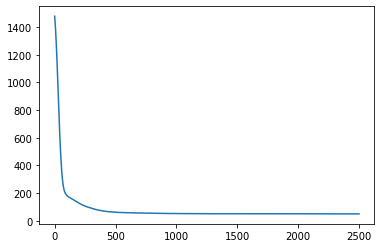

In [14]:
part_b()

# part C

In [15]:
def part_c():
    model = regression_model(1)
    loss=[]
    for i in range(50):
        history=model.fit(x_train, y_train, validation_split=0.3, epochs=100, validation_data=(x_test, y_test))
        val_loss=np.array(history.history['val_loss'])
        for vl in val_loss:
            loss.append(vl)
        print('({})validation loss  mean: {}'.format(i, val_loss.mean()))
        print('({})validation loss  standard deviation: {}'.format(i, val_loss.std()))
    plt.plot(loss)

Epoch 1/100
16/16 [==============================] - 0s 12ms/step - loss: 1418.4857 - val_loss: 1497.6924
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1473.2103 - val_loss: 1485.8131
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1447.0810 - val_loss: 1473.8280
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1510.6124 - val_loss: 1461.5208
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1500.8448 - val_loss: 1448.9288
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1340.6650 - val_loss: 1436.0886
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 1413.9518 - val_loss: 1422.7909
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 1390.9287 - val_loss: 1408.8407
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 1398.1863 - val_loss: 1394.4044
Epoch 10/100
16/16 [==============================] - 

Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 144.9145 - val_loss: 147.9497
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 144.2167 - val_loss: 147.2977
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 143.5448 - val_loss: 146.7688
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 142.9470 - val_loss: 146.1617
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 142.2322 - val_loss: 145.5327
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 141.6084 - val_loss: 144.9519
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 141.0002 - val_loss: 144.4011
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 140.3337 - val_loss: 143.8198
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 139.7285 - val_loss: 143.2628
Epoch 66/100
16/16 [==============================] - 0s 4ms/ste

Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 103.1327 - val_loss: 107.6895
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 102.7523 - val_loss: 107.2813
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 102.3106 - val_loss: 106.9754
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 101.8791 - val_loss: 106.5974
Epoch 39/100
16/16 [==============================] - 0s 4ms/step - loss: 101.4495 - val_loss: 106.0753
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 101.0756 - val_loss: 105.6650
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 100.6280 - val_loss: 105.2351
Epoch 42/100
16/16 [==============================] - 0s 4ms/step - loss: 100.2153 - val_loss: 104.9660
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 99.8127 - val_loss: 104.6954
Epoch 44/100
16/16 [==============================] - 0s 4ms/step

16/16 [==============================] - 0s 5ms/step - loss: 76.5102 - val_loss: 83.5238
Epoch 15/100
16/16 [==============================] - 0s 5ms/step - loss: 76.2130 - val_loss: 83.2216
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 75.9317 - val_loss: 83.0644
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 75.6674 - val_loss: 82.7449
Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 75.4465 - val_loss: 82.3755
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 75.2019 - val_loss: 82.2189
Epoch 20/100
16/16 [==============================] - 0s 4ms/step - loss: 74.8734 - val_loss: 82.0597
Epoch 21/100
16/16 [==============================] - 0s 4ms/step - loss: 74.6494 - val_loss: 81.9070
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 74.3961 - val_loss: 81.6055
Epoch 23/100
16/16 [==============================] - 0s 4ms/step - loss: 74.0976 - val_loss: 8

16/16 [==============================] - 0s 5ms/step - loss: 46.4938 - val_loss: 57.6587
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 46.3815 - val_loss: 57.4911
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 46.3283 - val_loss: 57.2435
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 46.2232 - val_loss: 57.2535
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 46.1176 - val_loss: 57.1244
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 46.0600 - val_loss: 57.1696
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 45.9445 - val_loss: 57.1468
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 45.8663 - val_loss: 56.7768
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 45.7745 - val_loss: 56.7906
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 45.7409 - val_loss: 5

16/16 [==============================] - 0s 6ms/step - loss: 38.1763 - val_loss: 49.1972
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 38.1588 - val_loss: 49.3337
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 38.1396 - val_loss: 49.3172
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 38.1697 - val_loss: 49.1776
Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 38.0955 - val_loss: 49.2016
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 38.1002 - val_loss: 49.2688
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 38.0504 - val_loss: 49.2573
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 38.0019 - val_loss: 48.9670
Epoch 39/100
16/16 [==============================] - 0s 4ms/step - loss: 38.0488 - val_loss: 49.0627
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 37.9665 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 35.0299 - val_loss: 45.7272
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 35.1054 - val_loss: 45.9341
Epoch 92/100
16/16 [==============================] - 0s 5ms/step - loss: 35.0600 - val_loss: 45.5828
Epoch 93/100
16/16 [==============================] - 0s 6ms/step - loss: 35.0056 - val_loss: 45.6957
Epoch 94/100
16/16 [==============================] - 0s 7ms/step - loss: 34.9545 - val_loss: 45.8079
Epoch 95/100
16/16 [==============================] - 0s 5ms/step - loss: 34.9647 - val_loss: 45.7102
Epoch 96/100
16/16 [==============================] - 0s 4ms/step - loss: 34.9812 - val_loss: 45.8515
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 34.9638 - val_loss: 45.6424
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 34.9059 - val_loss: 45.6649
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 34.9764 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 33.4898 - val_loss: 43.9688
Epoch 49/100
16/16 [==============================] - 0s 4ms/step - loss: 33.5365 - val_loss: 44.0400
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4333 - val_loss: 43.8611
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 33.5323 - val_loss: 43.9950
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4955 - val_loss: 44.1601
Epoch 53/100
16/16 [==============================] - 0s 5ms/step - loss: 33.4318 - val_loss: 43.9788
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4615 - val_loss: 43.8205
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4840 - val_loss: 43.6602
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4832 - val_loss: 44.1058
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 33.4288 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 32.4398 - val_loss: 42.5619
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 32.3682 - val_loss: 42.2463
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 32.3223 - val_loss: 42.3083
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 32.2992 - val_loss: 42.3925
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 32.3489 - val_loss: 42.2731
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 32.3415 - val_loss: 42.2410
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 32.2873 - val_loss: 42.4194
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 32.3540 - val_loss: 42.3284
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 32.2895 - val_loss: 42.4092
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 32.2706 - val_loss: 42.2

16/16 [==============================] - 0s 5ms/step - loss: 31.6619 - val_loss: 41.7050
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 31.6486 - val_loss: 41.5820
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 31.5673 - val_loss: 41.4105
Epoch 68/100
16/16 [==============================] - 0s 6ms/step - loss: 31.6215 - val_loss: 41.5068
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 31.5493 - val_loss: 41.4639
Epoch 70/100
16/16 [==============================] - 0s 4ms/step - loss: 31.5531 - val_loss: 41.5840
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 31.5584 - val_loss: 41.6450
Epoch 72/100
16/16 [==============================] - 0s 4ms/step - loss: 31.5058 - val_loss: 41.5912
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 31.5535 - val_loss: 41.7214
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 31.5525 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 31.0670 - val_loss: 41.0166
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 31.0424 - val_loss: 41.1839
Epoch 25/100
16/16 [==============================] - 0s 5ms/step - loss: 31.0373 - val_loss: 40.9411
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 30.9890 - val_loss: 41.0159
Epoch 27/100
16/16 [==============================] - 0s 4ms/step - loss: 31.0007 - val_loss: 41.0599
Epoch 28/100
16/16 [==============================] - 0s 4ms/step - loss: 31.0068 - val_loss: 40.9799
Epoch 29/100
16/16 [==============================] - 0s 4ms/step - loss: 31.0145 - val_loss: 40.9425
Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 30.9895 - val_loss: 40.9550
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 31.0032 - val_loss: 40.9502
Epoch 32/100
16/16 [==============================] - 0s 4ms/step - loss: 30.9885 - val_loss: 4

16/16 [==============================] - 0s 5ms/step - loss: 30.6302 - val_loss: 40.6444
Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 30.6266 - val_loss: 40.4395
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 30.6014 - val_loss: 40.4464
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 30.5801 - val_loss: 40.4052
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 30.6230 - val_loss: 40.5230
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 30.6208 - val_loss: 40.4601
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 30.5941 - val_loss: 40.4073
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 30.6457 - val_loss: 40.6507
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 30.5777 - val_loss: 40.5461
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 30.5870 - val_loss: 4

16/16 [==============================] - 0s 4ms/step - loss: 30.2708 - val_loss: 40.2031
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 30.3074 - val_loss: 40.2925
Epoch 42/100
16/16 [==============================] - 0s 4ms/step - loss: 30.3681 - val_loss: 40.1400
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 30.2657 - val_loss: 40.2742
Epoch 44/100
16/16 [==============================] - 0s 5ms/step - loss: 30.2751 - val_loss: 40.3101
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 30.3228 - val_loss: 40.1196
Epoch 46/100
16/16 [==============================] - 0s 4ms/step - loss: 30.3341 - val_loss: 40.3433
Epoch 47/100
16/16 [==============================] - 0s 4ms/step - loss: 30.2933 - val_loss: 40.2197
Epoch 48/100
16/16 [==============================] - 0s 5ms/step - loss: 30.3020 - val_loss: 40.3493
Epoch 49/100
16/16 [==============================] - 0s 6ms/step - loss: 30.2606 - val_loss: 4

16/16 [==============================] - 0s 6ms/step - loss: 30.0465 - val_loss: 40.0203
Epoch 100/100
16/16 [==============================] - 0s 6ms/step - loss: 30.0691 - val_loss: 39.9972
(18)validation loss  mean: 40.035010528564456
(18)validation loss  standard deviation: 0.09873296885167843
Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 30.0446 - val_loss: 39.9487
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 30.1172 - val_loss: 39.9387
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 30.0645 - val_loss: 40.0876
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 30.1097 - val_loss: 40.0221
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 30.1002 - val_loss: 40.0073
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 30.0635 - val_loss: 40.0224
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 30.0547 - val_loss: 39

16/16 [==============================] - 0s 4ms/step - loss: 29.8298 - val_loss: 39.9185
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 29.9344 - val_loss: 39.6294
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 29.8759 - val_loss: 39.8655
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 29.8290 - val_loss: 39.8013
Epoch 61/100
16/16 [==============================] - 0s 6ms/step - loss: 29.9086 - val_loss: 39.9311
Epoch 62/100
16/16 [==============================] - 0s 6ms/step - loss: 29.8497 - val_loss: 39.7385
Epoch 63/100
16/16 [==============================] - 0s 6ms/step - loss: 29.8307 - val_loss: 39.7123
Epoch 64/100
16/16 [==============================] - 0s 5ms/step - loss: 29.8354 - val_loss: 39.7722
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 29.8264 - val_loss: 39.8465
Epoch 66/100
16/16 [==============================] - 0s 6ms/step - loss: 29.8679 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 29.7568 - val_loss: 39.7396
Epoch 16/100
16/16 [==============================] - 0s 6ms/step - loss: 29.6661 - val_loss: 39.6565
Epoch 17/100
16/16 [==============================] - 0s 6ms/step - loss: 29.6787 - val_loss: 39.6660
Epoch 18/100
16/16 [==============================] - 0s 6ms/step - loss: 29.7089 - val_loss: 39.6443
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 29.6748 - val_loss: 39.6949
Epoch 20/100
16/16 [==============================] - 0s 6ms/step - loss: 29.6510 - val_loss: 39.5490
Epoch 21/100
16/16 [==============================] - 0s 6ms/step - loss: 29.6866 - val_loss: 39.7373
Epoch 22/100
16/16 [==============================] - 0s 6ms/step - loss: 29.7462 - val_loss: 39.7300
Epoch 23/100
16/16 [==============================] - 0s 5ms/step - loss: 29.7147 - val_loss: 39.6044
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 29.6798 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 29.6064 - val_loss: 39.6106
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5161 - val_loss: 39.5935
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5419 - val_loss: 39.5175
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5513 - val_loss: 39.5113
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5503 - val_loss: 39.6647
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5625 - val_loss: 39.5741
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5370 - val_loss: 39.6045
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5568 - val_loss: 39.5249
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5485 - val_loss: 39.6614
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5227 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 29.4523 - val_loss: 39.6276
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4657 - val_loss: 39.4370
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4530 - val_loss: 39.4917
Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4297 - val_loss: 39.5657
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4325 - val_loss: 39.5766
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5089 - val_loss: 39.2906
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5326 - val_loss: 39.5197
Epoch 39/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4170 - val_loss: 39.3619
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 29.5160 - val_loss: 39.5513
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 29.3961 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 29.1909 - val_loss: 38.8304
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 29.3585 - val_loss: 38.5125
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2496 - val_loss: 38.8215
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2470 - val_loss: 38.8298
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 29.4398 - val_loss: 38.9123
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 29.3026 - val_loss: 38.6730
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2345 - val_loss: 38.6940
Epoch 98/100
16/16 [==============================] - 0s 5ms/step - loss: 29.2325 - val_loss: 38.7362
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2510 - val_loss: 38.6766
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2456 - val_loss: 

16/16 [==============================] - 0s 4ms/step - loss: 29.1699 - val_loss: 38.3803
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 29.2002 - val_loss: 38.7018
Epoch 51/100
16/16 [==============================] - 0s 5ms/step - loss: 29.0597 - val_loss: 38.5627
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 29.0834 - val_loss: 38.5202
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 29.0659 - val_loss: 38.4803
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 29.1118 - val_loss: 38.5574
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 29.1215 - val_loss: 38.3306
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 29.0963 - val_loss: 38.4547
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 29.0724 - val_loss: 38.4942
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 29.1584 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 28.9752 - val_loss: 38.3332
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9203 - val_loss: 38.3962
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9793 - val_loss: 38.5060
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9788 - val_loss: 38.3746
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9618 - val_loss: 38.3628
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9654 - val_loss: 38.3621
Epoch 13/100
16/16 [==============================] - 0s 5ms/step - loss: 28.9792 - val_loss: 38.5052
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 28.9402 - val_loss: 38.4219
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 28.9479 - val_loss: 38.3655
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 28.9808 - val_loss: 38.

16/16 [==============================] - 0s 4ms/step - loss: 28.9448 - val_loss: 37.9991
Epoch 67/100
16/16 [==============================] - 0s 4ms/step - loss: 28.9360 - val_loss: 38.3645
Epoch 68/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7861 - val_loss: 38.2773
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8005 - val_loss: 38.2489
Epoch 70/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8213 - val_loss: 38.1512
Epoch 71/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7966 - val_loss: 38.2029
Epoch 72/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8490 - val_loss: 38.1795
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8322 - val_loss: 38.2300
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8002 - val_loss: 38.2364
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 28.8339 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 28.7314 - val_loss: 38.0865
Epoch 25/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7514 - val_loss: 38.0067
Epoch 26/100
16/16 [==============================] - 0s 4ms/step - loss: 28.6946 - val_loss: 38.0823
Epoch 27/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7451 - val_loss: 38.0494
Epoch 28/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7102 - val_loss: 38.0644
Epoch 29/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7153 - val_loss: 38.1357
Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7023 - val_loss: 38.0923
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7211 - val_loss: 38.1435
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 28.7608 - val_loss: 38.0640
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 28.7213 - val_loss: 3

16/16 [==============================] - 0s 6ms/step - loss: 28.6678 - val_loss: 37.9137
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6412 - val_loss: 37.8493
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 28.6617 - val_loss: 37.9015
Epoch 86/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6758 - val_loss: 37.8037
Epoch 87/100
16/16 [==============================] - 0s 6ms/step - loss: 28.6860 - val_loss: 38.0426
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 28.6393 - val_loss: 37.8150
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 28.6725 - val_loss: 37.8697
Epoch 90/100
16/16 [==============================] - 0s 6ms/step - loss: 28.6259 - val_loss: 37.8849
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 28.6581 - val_loss: 37.9281
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 28.6477 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 28.6723 - val_loss: 37.7378
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6441 - val_loss: 37.8728
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6271 - val_loss: 37.7971
Epoch 44/100
16/16 [==============================] - 0s 6ms/step - loss: 28.6364 - val_loss: 37.5996
Epoch 45/100
16/16 [==============================] - 0s 6ms/step - loss: 28.6888 - val_loss: 37.5643
Epoch 46/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6023 - val_loss: 37.7868
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6177 - val_loss: 37.6934
Epoch 48/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6087 - val_loss: 37.8691
Epoch 49/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6140 - val_loss: 37.8631
Epoch 50/100
16/16 [==============================] - 0s 5ms/step - loss: 28.6145 - val_loss: 3

16/16 [==============================] - 0s 6ms/step - loss: 28.5578 - val_loss: 37.6058
(37)validation loss  mean: 37.61485466003418
(37)validation loss  standard deviation: 0.08317395344004962
Epoch 1/100
16/16 [==============================] - 0s 10ms/step - loss: 28.5545 - val_loss: 37.5267
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5594 - val_loss: 37.5698
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5889 - val_loss: 37.5461
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5684 - val_loss: 37.6222
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5787 - val_loss: 37.6305
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5762 - val_loss: 37.6364
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5836 - val_loss: 37.4754
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5995 - val_loss: 37.4

16/16 [==============================] - 0s 5ms/step - loss: 28.5055 - val_loss: 37.4581
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5653 - val_loss: 37.4708
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4997 - val_loss: 37.4606
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5066 - val_loss: 37.4691
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4992 - val_loss: 37.5303
Epoch 63/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5104 - val_loss: 37.6280
Epoch 64/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4904 - val_loss: 37.4499
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 28.5103 - val_loss: 37.5120
Epoch 66/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5168 - val_loss: 37.4919
Epoch 67/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4957 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 28.4656 - val_loss: 37.4206
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 28.5105 - val_loss: 37.4666
Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4652 - val_loss: 37.3897
Epoch 19/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4767 - val_loss: 37.3515
Epoch 20/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4460 - val_loss: 37.4606
Epoch 21/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4765 - val_loss: 37.4256
Epoch 22/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4821 - val_loss: 37.3128
Epoch 23/100
16/16 [==============================] - 0s 6ms/step - loss: 28.5084 - val_loss: 37.4392
Epoch 24/100
16/16 [==============================] - 0s 6ms/step - loss: 28.4664 - val_loss: 37.3030
Epoch 25/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4535 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 28.4482 - val_loss: 37.2232
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4269 - val_loss: 37.4260
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4444 - val_loss: 37.2807
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 28.5299 - val_loss: 37.3230
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4132 - val_loss: 37.2912
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4600 - val_loss: 37.3101
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4923 - val_loss: 37.4021
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4530 - val_loss: 37.2569
Epoch 83/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4495 - val_loss: 37.3138
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4757 - val_loss: 3

16/16 [==============================] - 0s 7ms/step - loss: 28.3707 - val_loss: 37.2682
Epoch 34/100
16/16 [==============================] - 0s 6ms/step - loss: 28.4126 - val_loss: 37.1627
Epoch 35/100
16/16 [==============================] - 0s 5ms/step - loss: 28.3892 - val_loss: 37.3002
Epoch 36/100
16/16 [==============================] - 0s 5ms/step - loss: 28.5254 - val_loss: 37.3876
Epoch 37/100
16/16 [==============================] - 0s 6ms/step - loss: 28.3840 - val_loss: 37.3316
Epoch 38/100
16/16 [==============================] - 0s 6ms/step - loss: 28.4516 - val_loss: 37.2616
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 28.4337 - val_loss: 37.2914
Epoch 40/100
16/16 [==============================] - 0s 7ms/step - loss: 28.3768 - val_loss: 37.3016
Epoch 41/100
16/16 [==============================] - 0s 7ms/step - loss: 28.4347 - val_loss: 37.2977
Epoch 42/100
16/16 [==============================] - 0s 8ms/step - loss: 28.4265 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 28.3909 - val_loss: 37.0721
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3878 - val_loss: 37.2666
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3750 - val_loss: 37.3102
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3353 - val_loss: 37.2686
Epoch 96/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3574 - val_loss: 37.2412
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3875 - val_loss: 37.1419
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 28.4208 - val_loss: 37.1980
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3486 - val_loss: 37.1224
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 28.3771 - val_loss: 37.3152
(45)validation loss  mean: 37.27836071014404
(45)validation loss  standard deviation: 0.081659

16/16 [==============================] - 0s 4ms/step - loss: 28.2748 - val_loss: 37.0595
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2603 - val_loss: 37.1880
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2446 - val_loss: 37.1863
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2382 - val_loss: 37.1807
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2320 - val_loss: 37.2069
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2292 - val_loss: 37.1095
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2204 - val_loss: 37.2462
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2265 - val_loss: 37.1337
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 28.2234 - val_loss: 37.1586
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 28.1991 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 27.5992 - val_loss: 37.0426
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 27.5992 - val_loss: 37.0886
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 27.6252 - val_loss: 36.9759
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 27.6609 - val_loss: 36.8977
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 27.5985 - val_loss: 37.0073
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 27.5995 - val_loss: 36.9510
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 27.6186 - val_loss: 37.0756
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 27.6382 - val_loss: 37.1532
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 27.5989 - val_loss: 37.0099
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 27.6038 - val_loss: 37

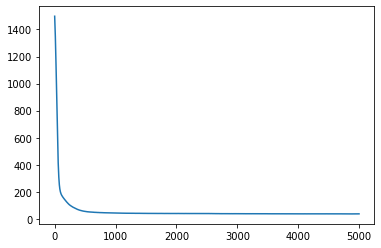

In [16]:
part_c()

# part D

In [17]:
def part_d():
    # construct the model with 3 hidden layers
    model = regression_model(3)
    loss=[]
    for i in range(50):
        history=model.fit(x_train, y_train, validation_split=0.3, epochs=100, validation_data=(x_test, y_test))
        val_loss=np.array(history.history['val_loss'])
        for vl in val_loss:
            loss.append(vl)
        print('({})validation loss  mean: {}'.format(i, val_loss.mean()))
        print('({})validation loss  standard deviation: {}'.format(i, val_loss.std()))
    plt.plot(loss)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 1595.8537 - val_loss: 1529.8549
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1507.6448 - val_loss: 1510.9186
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1566.6763 - val_loss: 1487.5089
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 1419.7415 - val_loss: 1458.2983
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1382.9054 - val_loss: 1419.4882
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1375.2625 - val_loss: 1366.8330
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 1332.8255 - val_loss: 1293.9578
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 1202.9445 - val_loss: 1195.7782
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 1147.5222 - val_loss: 1067.4015
Epoch 10/100
16/16 [==============================] - 

Epoch 80/100
16/16 [==============================] - 0s 6ms/step - loss: 85.8957 - val_loss: 102.8903
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 88.8914 - val_loss: 102.6825
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 77.8398 - val_loss: 102.4226
Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 95.6866 - val_loss: 100.4255
Epoch 84/100
16/16 [==============================] - 0s 7ms/step - loss: 80.6716 - val_loss: 100.3200
Epoch 85/100
16/16 [==============================] - 0s 6ms/step - loss: 82.9548 - val_loss: 98.6947
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 82.2756 - val_loss: 99.1600
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 80.6942 - val_loss: 98.3855
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 81.9642 - val_loss: 96.8951
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 85.

16/16 [==============================] - 0s 9ms/step - loss: 35.9085 - val_loss: 48.6520
Epoch 39/100
16/16 [==============================] - 0s 11ms/step - loss: 36.1015 - val_loss: 48.6818
Epoch 40/100
16/16 [==============================] - 0s 9ms/step - loss: 35.7955 - val_loss: 48.3939
Epoch 41/100
16/16 [==============================] - 0s 5ms/step - loss: 36.5441 - val_loss: 48.1129
Epoch 42/100
16/16 [==============================] - 0s 6ms/step - loss: 36.1132 - val_loss: 47.9817
Epoch 43/100
16/16 [==============================] - 0s 7ms/step - loss: 35.6996 - val_loss: 48.6326
Epoch 44/100
16/16 [==============================] - 0s 6ms/step - loss: 35.5901 - val_loss: 48.1539
Epoch 45/100
16/16 [==============================] - 0s 7ms/step - loss: 35.5160 - val_loss: 47.7462
Epoch 46/100
16/16 [==============================] - 0s 6ms/step - loss: 35.3626 - val_loss: 47.9931
Epoch 47/100
16/16 [==============================] - 0s 5ms/step - loss: 35.4603 - val_loss: 

16/16 [==============================] - 0s 5ms/step - loss: 26.8239 - val_loss: 39.8868
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 26.8461 - val_loss: 39.2964
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 26.7692 - val_loss: 39.8189
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 27.2082 - val_loss: 39.4769
(3)validation loss  mean: 40.960464820861816
(3)validation loss  standard deviation: 1.2224921230533845
Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 27.4462 - val_loss: 39.2098
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 26.8861 - val_loss: 39.5889
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 26.3482 - val_loss: 38.6365
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 26.4622 - val_loss: 39.1301
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 26.7540 - val_loss: 38.

16/16 [==============================] - 0s 5ms/step - loss: 23.7381 - val_loss: 37.5789
Epoch 56/100
16/16 [==============================] - 0s 5ms/step - loss: 23.5382 - val_loss: 37.3917
Epoch 57/100
16/16 [==============================] - 0s 5ms/step - loss: 23.5610 - val_loss: 37.0937
Epoch 58/100
16/16 [==============================] - 0s 5ms/step - loss: 23.5262 - val_loss: 37.4153
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 23.4082 - val_loss: 37.6393
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 23.4242 - val_loss: 37.2956
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 23.5678 - val_loss: 37.0081
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 23.5105 - val_loss: 38.3652
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 23.4433 - val_loss: 37.2715
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 23.3098 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 21.5895 - val_loss: 36.2592
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 21.4861 - val_loss: 36.3540
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 21.4682 - val_loss: 36.9993
Epoch 16/100
16/16 [==============================] - 0s 5ms/step - loss: 21.6782 - val_loss: 36.0327
Epoch 17/100
16/16 [==============================] - 0s 5ms/step - loss: 21.3740 - val_loss: 36.8569
Epoch 18/100
16/16 [==============================] - 0s 5ms/step - loss: 21.4341 - val_loss: 36.2903
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 21.3990 - val_loss: 37.0957
Epoch 20/100
16/16 [==============================] - 0s 5ms/step - loss: 21.6901 - val_loss: 36.2165
Epoch 21/100
16/16 [==============================] - 0s 5ms/step - loss: 21.4350 - val_loss: 36.6561
Epoch 22/100
16/16 [==============================] - 0s 6ms/step - loss: 21.3777 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 19.9991 - val_loss: 35.0357
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 19.9406 - val_loss: 34.3282
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 20.0285 - val_loss: 34.4304
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 20.2610 - val_loss: 35.1627
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 20.0381 - val_loss: 34.4826
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 20.0601 - val_loss: 34.4443
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 20.2178 - val_loss: 35.7713
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 19.9452 - val_loss: 34.4098
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 19.9610 - val_loss: 34.6363
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 20.1362 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 19.4880 - val_loss: 33.7538
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 19.3283 - val_loss: 33.5915
Epoch 32/100
16/16 [==============================] - 0s 4ms/step - loss: 19.0391 - val_loss: 33.7820
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 18.9899 - val_loss: 34.3474
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 18.8384 - val_loss: 33.5501
Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 18.8119 - val_loss: 33.6730
Epoch 36/100
16/16 [==============================] - 0s 4ms/step - loss: 18.8616 - val_loss: 34.0250
Epoch 37/100
16/16 [==============================] - 0s 4ms/step - loss: 18.8579 - val_loss: 33.5211
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 18.9963 - val_loss: 33.7214
Epoch 39/100
16/16 [==============================] - 0s 5ms/step - loss: 18.9440 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 18.1815 - val_loss: 33.1212
Epoch 90/100
16/16 [==============================] - 0s 5ms/step - loss: 18.5865 - val_loss: 32.8765
Epoch 91/100
16/16 [==============================] - 0s 5ms/step - loss: 18.6838 - val_loss: 33.3818
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 18.3902 - val_loss: 34.2448
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 18.2681 - val_loss: 33.1896
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 18.0637 - val_loss: 33.4445
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 18.1298 - val_loss: 34.1608
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 18.1935 - val_loss: 33.4863
Epoch 97/100
16/16 [==============================] - 0s 5ms/step - loss: 18.1431 - val_loss: 33.3851
Epoch 98/100
16/16 [==============================] - 0s 5ms/step - loss: 18.0366 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 17.3650 - val_loss: 34.0428
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 17.5836 - val_loss: 33.8591
Epoch 49/100
16/16 [==============================] - 0s 4ms/step - loss: 17.4665 - val_loss: 33.6383
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 17.5476 - val_loss: 33.4693
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 17.6355 - val_loss: 34.3486
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 17.6261 - val_loss: 33.8335
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 17.6169 - val_loss: 33.1392
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 17.3289 - val_loss: 33.5274
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 17.2416 - val_loss: 34.4796
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 17.6722 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 16.8706 - val_loss: 33.7244
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 16.9110 - val_loss: 34.0167
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 16.9266 - val_loss: 33.6598
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 17.0477 - val_loss: 33.2721
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 16.7064 - val_loss: 34.3386
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 16.8291 - val_loss: 33.6281
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 16.6379 - val_loss: 33.8280
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 16.7333 - val_loss: 34.2712
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 17.2480 - val_loss: 33.1181
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 17.1526 - val_loss: 33.87

16/16 [==============================] - 0s 4ms/step - loss: 17.1144 - val_loss: 36.4999
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 17.1255 - val_loss: 33.1877
Epoch 66/100
16/16 [==============================] - 0s 5ms/step - loss: 17.2565 - val_loss: 33.2422
Epoch 67/100
16/16 [==============================] - 0s 5ms/step - loss: 16.8436 - val_loss: 35.7533
Epoch 68/100
16/16 [==============================] - 0s 4ms/step - loss: 16.5218 - val_loss: 33.1409
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 16.3439 - val_loss: 34.3912
Epoch 70/100
16/16 [==============================] - 0s 4ms/step - loss: 16.5134 - val_loss: 33.2020
Epoch 71/100
16/16 [==============================] - 0s 4ms/step - loss: 16.7935 - val_loss: 33.4124
Epoch 72/100
16/16 [==============================] - 0s 4ms/step - loss: 16.6633 - val_loss: 34.6770
Epoch 73/100
16/16 [==============================] - 0s 4ms/step - loss: 16.3496 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 16.0080 - val_loss: 33.2586
Epoch 23/100
16/16 [==============================] - 0s 4ms/step - loss: 16.2042 - val_loss: 34.1850
Epoch 24/100
16/16 [==============================] - 0s 5ms/step - loss: 16.2516 - val_loss: 33.7573
Epoch 25/100
16/16 [==============================] - 0s 4ms/step - loss: 16.1383 - val_loss: 33.5209
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 15.9674 - val_loss: 33.4460
Epoch 27/100
16/16 [==============================] - 0s 5ms/step - loss: 15.9663 - val_loss: 33.6202
Epoch 28/100
16/16 [==============================] - 0s 5ms/step - loss: 16.1074 - val_loss: 33.1132
Epoch 29/100
16/16 [==============================] - 0s 4ms/step - loss: 16.3205 - val_loss: 34.1551
Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 16.1841 - val_loss: 34.6306
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 16.2112 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 15.9796 - val_loss: 33.5220
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 15.9106 - val_loss: 33.5041
Epoch 83/100
16/16 [==============================] - 0s 5ms/step - loss: 16.0268 - val_loss: 33.9441
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 15.8368 - val_loss: 33.2324
Epoch 85/100
16/16 [==============================] - 0s 6ms/step - loss: 15.8472 - val_loss: 33.9441
Epoch 86/100
16/16 [==============================] - 0s 5ms/step - loss: 16.2160 - val_loss: 34.2727
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 15.8905 - val_loss: 33.9903
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 15.8268 - val_loss: 33.4176
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 15.9011 - val_loss: 33.5714
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 15.7356 - val_loss: 3

16/16 [==============================] - 0s 8ms/step - loss: 15.7214 - val_loss: 33.0859
Epoch 40/100
16/16 [==============================] - 0s 6ms/step - loss: 15.7030 - val_loss: 33.0795
Epoch 41/100
16/16 [==============================] - 0s 7ms/step - loss: 15.6046 - val_loss: 33.6402
Epoch 42/100
16/16 [==============================] - 0s 9ms/step - loss: 15.7901 - val_loss: 33.2955
Epoch 43/100
16/16 [==============================] - 0s 8ms/step - loss: 15.8767 - val_loss: 32.9648
Epoch 44/100
16/16 [==============================] - 0s 8ms/step - loss: 15.7520 - val_loss: 34.5808
Epoch 45/100
16/16 [==============================] - 0s 7ms/step - loss: 15.8687 - val_loss: 33.1170
Epoch 46/100
16/16 [==============================] - 0s 6ms/step - loss: 15.7343 - val_loss: 33.1369
Epoch 47/100
16/16 [==============================] - 0s 4ms/step - loss: 15.5978 - val_loss: 32.9041
Epoch 48/100
16/16 [==============================] - 0s 7ms/step - loss: 15.7026 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 15.6649 - val_loss: 33.1431
Epoch 99/100
16/16 [==============================] - 0s 5ms/step - loss: 15.5584 - val_loss: 33.1050
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 15.6560 - val_loss: 33.1394
(22)validation loss  mean: 33.303380813598636
(22)validation loss  standard deviation: 0.5719599643425305
Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 15.6961 - val_loss: 32.7178
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 15.4084 - val_loss: 33.1015
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 15.5033 - val_loss: 33.4264
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 15.5213 - val_loss: 33.3972
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 15.5164 - val_loss: 33.5051
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 15.7270 - val_loss: 33

16/16 [==============================] - 0s 4ms/step - loss: 15.3493 - val_loss: 33.0812
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 15.5510 - val_loss: 32.6253
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 15.5636 - val_loss: 33.1749
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4595 - val_loss: 33.4277
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3171 - val_loss: 32.8835
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3719 - val_loss: 33.7915
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 15.4860 - val_loss: 33.2831
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4095 - val_loss: 32.7049
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 15.6471 - val_loss: 32.7677
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 15.9504 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.6283 - val_loss: 33.1309
Epoch 15/100
16/16 [==============================] - 0s 5ms/step - loss: 15.3150 - val_loss: 34.0533
Epoch 16/100
16/16 [==============================] - 0s 5ms/step - loss: 15.7986 - val_loss: 33.3107
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4173 - val_loss: 32.9719
Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4692 - val_loss: 32.6383
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2930 - val_loss: 33.3731
Epoch 20/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4401 - val_loss: 33.4526
Epoch 21/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2033 - val_loss: 32.6241
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3905 - val_loss: 33.6315
Epoch 23/100
16/16 [==============================] - 0s 5ms/step - loss: 15.4585 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.5075 - val_loss: 33.5041
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3357 - val_loss: 34.0272
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2818 - val_loss: 33.7745
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3685 - val_loss: 33.1590
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3421 - val_loss: 33.4150
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 15.2110 - val_loss: 32.8960
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 15.3248 - val_loss: 34.4720
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2823 - val_loss: 33.0121
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1889 - val_loss: 33.5882
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 15.4216 - val_loss: 3

16/16 [==============================] - 0s 5ms/step - loss: 15.0907 - val_loss: 33.5140
Epoch 32/100
16/16 [==============================] - 0s 5ms/step - loss: 15.2286 - val_loss: 33.2129
Epoch 33/100
16/16 [==============================] - 0s 5ms/step - loss: 15.1551 - val_loss: 33.9933
Epoch 34/100
16/16 [==============================] - 0s 8ms/step - loss: 15.1632 - val_loss: 33.6620
Epoch 35/100
16/16 [==============================] - 0s 8ms/step - loss: 15.2240 - val_loss: 33.5906
Epoch 36/100
16/16 [==============================] - 0s 6ms/step - loss: 15.1467 - val_loss: 33.1942
Epoch 37/100
16/16 [==============================] - 0s 6ms/step - loss: 15.1698 - val_loss: 34.1997
Epoch 38/100
16/16 [==============================] - 0s 7ms/step - loss: 15.2146 - val_loss: 33.7812
Epoch 39/100
16/16 [==============================] - 0s 9ms/step - loss: 15.2192 - val_loss: 33.3752
Epoch 40/100
16/16 [==============================] - 0s 8ms/step - loss: 15.0339 - val_loss: 3

16/16 [==============================] - 0s 6ms/step - loss: 14.9312 - val_loss: 33.3776
Epoch 91/100
16/16 [==============================] - 0s 6ms/step - loss: 14.9893 - val_loss: 33.5857
Epoch 92/100
16/16 [==============================] - 0s 5ms/step - loss: 15.0042 - val_loss: 33.6507
Epoch 93/100
16/16 [==============================] - 0s 5ms/step - loss: 14.9549 - val_loss: 33.4636
Epoch 94/100
16/16 [==============================] - 0s 5ms/step - loss: 14.9636 - val_loss: 33.3677
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2258 - val_loss: 32.8929
Epoch 96/100
16/16 [==============================] - 0s 4ms/step - loss: 15.3222 - val_loss: 34.0823
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1626 - val_loss: 33.8038
Epoch 98/100
16/16 [==============================] - 0s 7ms/step - loss: 14.9119 - val_loss: 33.0348
Epoch 99/100
16/16 [==============================] - 0s 5ms/step - loss: 15.1219 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.0399 - val_loss: 33.8226
Epoch 49/100
16/16 [==============================] - 0s 5ms/step - loss: 15.0562 - val_loss: 33.5206
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8909 - val_loss: 32.9991
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9154 - val_loss: 33.9824
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1124 - val_loss: 33.9789
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0966 - val_loss: 32.9485
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9647 - val_loss: 33.7596
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0193 - val_loss: 34.0343
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8341 - val_loss: 32.8796
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8879 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.7583 - val_loss: 33.0309
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7687 - val_loss: 33.8584
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1045 - val_loss: 33.3396
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9021 - val_loss: 32.6882
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1380 - val_loss: 33.2542
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0636 - val_loss: 33.9104
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9674 - val_loss: 33.1751
Epoch 13/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8668 - val_loss: 33.6727
Epoch 14/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0005 - val_loss: 34.0109
Epoch 15/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8588 - val_loss: 33.0

16/16 [==============================] - 0s 6ms/step - loss: 14.8609 - val_loss: 33.4948
Epoch 66/100
16/16 [==============================] - 0s 6ms/step - loss: 14.9518 - val_loss: 33.1625
Epoch 67/100
16/16 [==============================] - 0s 6ms/step - loss: 14.8556 - val_loss: 33.2845
Epoch 68/100
16/16 [==============================] - 0s 5ms/step - loss: 15.1686 - val_loss: 35.1148
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0422 - val_loss: 33.8297
Epoch 70/100
16/16 [==============================] - 0s 5ms/step - loss: 15.2410 - val_loss: 33.0050
Epoch 71/100
16/16 [==============================] - 0s 5ms/step - loss: 14.6995 - val_loss: 33.7636
Epoch 72/100
16/16 [==============================] - 0s 5ms/step - loss: 14.8916 - val_loss: 33.4505
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 14.9940 - val_loss: 33.1368
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8866 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.1217 - val_loss: 32.7384
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1972 - val_loss: 33.1007
Epoch 25/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1119 - val_loss: 33.8513
Epoch 26/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9497 - val_loss: 34.1121
Epoch 27/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8667 - val_loss: 34.1907
Epoch 28/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8938 - val_loss: 33.5572
Epoch 29/100
16/16 [==============================] - 0s 5ms/step - loss: 14.6242 - val_loss: 33.4835
Epoch 30/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9418 - val_loss: 33.7484
Epoch 31/100
16/16 [==============================] - 0s 4ms/step - loss: 15.2285 - val_loss: 33.5954
Epoch 32/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7656 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.6948 - val_loss: 33.0716
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8062 - val_loss: 34.1451
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6986 - val_loss: 33.4440
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7744 - val_loss: 33.5842
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6198 - val_loss: 33.2023
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5920 - val_loss: 34.0909
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8063 - val_loss: 33.0252
Epoch 89/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9520 - val_loss: 33.0847
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 15.1384 - val_loss: 33.3997
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7839 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.1477 - val_loss: 33.1046
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7572 - val_loss: 33.2325
Epoch 42/100
16/16 [==============================] - 0s 6ms/step - loss: 14.9493 - val_loss: 33.5513
Epoch 43/100
16/16 [==============================] - 0s 5ms/step - loss: 14.8319 - val_loss: 33.3274
Epoch 44/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5468 - val_loss: 32.9670
Epoch 45/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7172 - val_loss: 33.3876
Epoch 46/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6545 - val_loss: 32.7460
Epoch 47/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6447 - val_loss: 32.9768
Epoch 48/100
16/16 [==============================] - 0s 4ms/step - loss: 14.8019 - val_loss: 33.5037
Epoch 49/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5850 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.8304 - val_loss: 34.3068
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7217 - val_loss: 33.0211
(41)validation loss  mean: 33.44675968170166
(41)validation loss  standard deviation: 0.5205162975394142
Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 14.5753 - val_loss: 33.0353
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6404 - val_loss: 32.7129
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 14.6958 - val_loss: 34.6620
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0306 - val_loss: 33.3287
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5788 - val_loss: 32.9959
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 14.7468 - val_loss: 33.6466
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7037 - val_loss: 32.9

16/16 [==============================] - 0s 4ms/step - loss: 15.0393 - val_loss: 34.0660
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4506 - val_loss: 33.0089
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5452 - val_loss: 33.0942
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6930 - val_loss: 33.3812
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6917 - val_loss: 33.2090
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 14.8383 - val_loss: 33.4309
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4296 - val_loss: 33.4633
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6145 - val_loss: 32.7612
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6087 - val_loss: 33.2539
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6279 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.6205 - val_loss: 33.4810
Epoch 16/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4335 - val_loss: 33.1139
Epoch 17/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5559 - val_loss: 33.4073
Epoch 18/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4122 - val_loss: 32.9757
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6310 - val_loss: 33.1000
Epoch 20/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7065 - val_loss: 32.5860
Epoch 21/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6203 - val_loss: 33.3333
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7791 - val_loss: 35.8063
Epoch 23/100
16/16 [==============================] - 0s 4ms/step - loss: 15.7068 - val_loss: 32.8824
Epoch 24/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6891 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.8364 - val_loss: 32.8123
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6504 - val_loss: 33.6390
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4371 - val_loss: 32.7284
Epoch 77/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4690 - val_loss: 33.3811
Epoch 78/100
16/16 [==============================] - 0s 4ms/step - loss: 14.3393 - val_loss: 32.8571
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7736 - val_loss: 33.8161
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6223 - val_loss: 33.7648
Epoch 81/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5605 - val_loss: 32.9950
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 14.3811 - val_loss: 33.5773
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5285 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 15.0325 - val_loss: 35.1716
Epoch 33/100
16/16 [==============================] - 0s 4ms/step - loss: 14.9126 - val_loss: 33.9401
Epoch 34/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6153 - val_loss: 32.9551
Epoch 35/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7226 - val_loss: 32.9718
Epoch 36/100
16/16 [==============================] - 0s 5ms/step - loss: 14.6085 - val_loss: 33.5002
Epoch 37/100
16/16 [==============================] - 0s 5ms/step - loss: 14.5696 - val_loss: 32.6718
Epoch 38/100
16/16 [==============================] - 0s 4ms/step - loss: 14.7162 - val_loss: 33.4252
Epoch 39/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6349 - val_loss: 32.7288
Epoch 40/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6108 - val_loss: 33.4277
Epoch 41/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5031 - val_loss: 3

16/16 [==============================] - 0s 4ms/step - loss: 14.4737 - val_loss: 32.6191
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5583 - val_loss: 33.2936
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5334 - val_loss: 33.7931
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5815 - val_loss: 33.0526
Epoch 95/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5847 - val_loss: 32.9990
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 14.5880 - val_loss: 33.6967
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 14.4781 - val_loss: 33.4132
Epoch 98/100
16/16 [==============================] - 0s 4ms/step - loss: 14.5761 - val_loss: 32.6816
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 15.0548 - val_loss: 33.0416
Epoch 100/100
16/16 [==============================] - 0s 4ms/step - loss: 14.6751 - val_loss: 

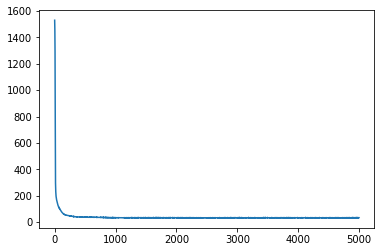

In [18]:
part_d()